# Author : Sevda Georgieva

## Prediction using Supervised Machine Learning
Used Linear Regression to predict exam scores based on number of hours of studying.

## **Packages**

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  

## **Import Dataset**

In [7]:
# Reading data from remote link
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

print('The first 5 instances:')
df.head()

The first 5 instances:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## **EDA to test correlation between the variables**

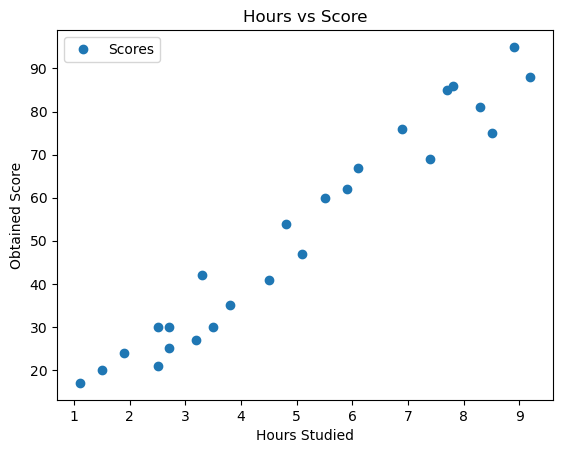

In [8]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Obtained Score')  
plt.show()

There is a clear positive linear relationship between the two variables i.e., the amount of study hours are a strong predictor for the score obtained from exams. 

## **Data Preprocessing**

In [9]:
# Use 'hours' as an independent variable to predict 'score' which is used asa the dependent variable
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

## **Model Training**

In [10]:
# Split model into train (80%) and test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42) 
# Use simple linear regression to predict the scores
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

LinearRegression()

## **Visualize Best-fit Line**

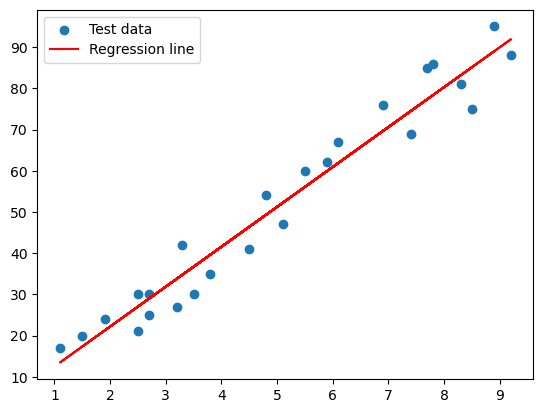

In [20]:
# Calculate the regression line
regression_line = regressor.coef_ * X + regressor.intercept_

# Plot the test data
plt.scatter(X, y, label='Test data')

# Plot the regression line
plt.plot(X, regression_line, color='red', label='Regression line')

# Display
plt.legend()
plt.show()


## **Making Predictions**

To assess prediction performance, I used the test data for the model to make predictions and later compare them to the ground truth.

In [31]:
# Predictions of the trained linear regression model using test data 
y_pred = regressor.predict(X_test)

# Comparing Actual vs Predicted
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df_pred

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


## **Model Fit**

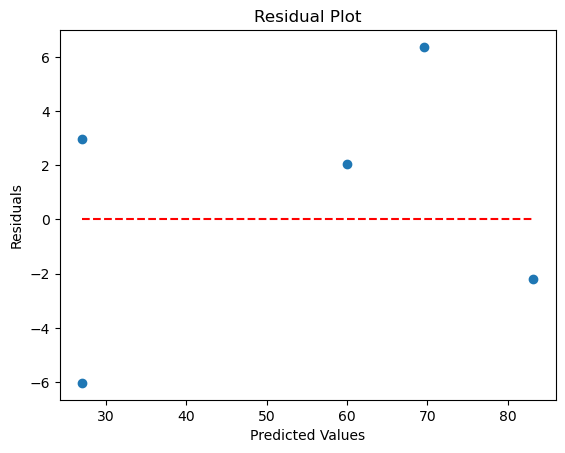

In [21]:
# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Interpretation of a Randomly Scattered Residual Plot
**Linearity:** The randomly scattered points suggest that the relationship between the independent variable(s) and the dependent variable is linear.
**Homoscedasticity:** The random scattering without any clear pattern suggests that the residuals have constant variance across all levels of the predicted values.

**Independence:** The lack of a pattern (e.g., clustering) suggests that the residuals are independent of each other. This satsifies the assumption of independence of errors.

**No Systematic Patterns:** The absence of systematic patterns (e.g., curves) implies that there are no obvious signs of model misspecification.

**Overall Conclusion**
The linear regression model indicates:
1. Good Fit: The model is likely capturing the true relationship between the variables accurately.
2. Valid Assumptions: The assumptions of linearity, homoscedasticity, and independence are likely met.
3. No Major Issues: There are no major issues such as non-linearity, heteroscedasticity, or autocorrelation detected.

In [32]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9491209376364416
Test Score: 0.9678055545167994


Good model fit, i.e., the linear regression can generalize on unseen data well.

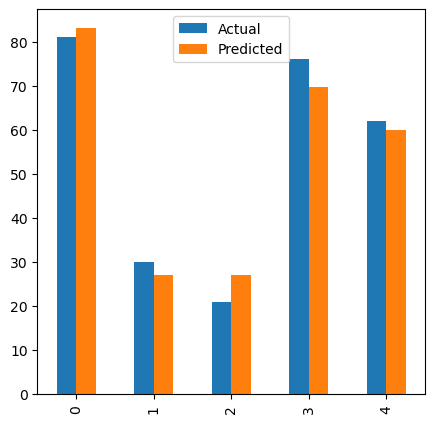

In [27]:
# Visualization of the difference between the true and predicted value 
df_pred.plot(kind='bar',figsize=(5,5))
plt.show()

## **Model Evaluation**

In [33]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R-2: 0.9678055545167994


## **Conclusion**

My linear regression model, which predicts exam scores based on the number of hours studied, has shown strong performance. Here’s a breakdown of the key metrics and what they signify:

**Mean Absolute Error (MAE):** 3.92 points
Interpretation: On average, the model's predictions for exam scores are within 3.92 points of the actual scores. This means that model prediction typically deviate by about 3.92 points from their actual exam score. For instance, if the actual score is 85, the model might predict a score between approximately 81 and 89.

**Mean Squared Error (MSE):** 18.94 points 
Interpretation: The average squared difference between the predicted and actual scores tells us that larger errors are infrequent. This means significant deviations from actual scores are relatively few. 
Note. 

**R-squared (R²):** 0.968 or 96.8%
Interpretation: The R² value signifies that our model explains 96.8% of the variance in exam scores based on study hours. This indicates a very strong relationship between study time and exam performance. Essentially, this model captures almost all the factors affecting exam scores that are related to study hours.